# BeitForSemanticSegmentation
This model returns logits.
Wrapper folder contains a function to convert them to a multi-labelled array.
It uses the image data set and fitness function created by the SEE-segment team lead by Dr Dirk Colbry.



In [1]:
from transformers import AutoImageProcessor, BeitForSemanticSegmentation
from PIL import Image
from wrapper import logit_image
import matplotlib.pylab as plt


In [2]:
image_path = 'Images/trump.png'
image = Image.open(image_path).convert("RGB")
image_path_GT = 'Images/trump_GT.png'
ground_truth = Image.open(image_path_GT).convert("RGB")

In [3]:
image_processor = AutoImageProcessor.from_pretrained("microsoft/beit-base-finetuned-ade-640-640")
model = BeitForSemanticSegmentation.from_pretrained("microsoft/beit-base-finetuned-ade-640-640")
inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)
# logits are of shape (batch_size, num_labels, height, width)
logits = outputs.logits
list(logits.shape)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


[1, 150, 160, 160]

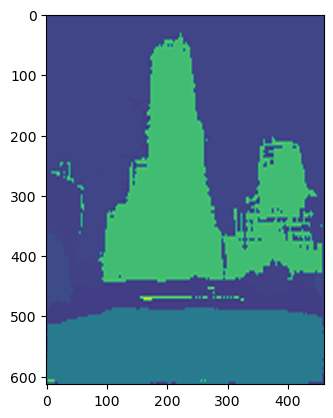

In [4]:
mask = logit_image.logits_to_image(image, logits)
plt.imshow(mask)